<div class="alert alert-success" role="alert">
  <h1 class="alert-heading">Regresión Ridge</h1>
  <h3 class="alert-heading">Prof. Enrique Mejía Ospino, emejia@uis.edu.co</h3>
  <h4 class="alert-heading">Escuela de Química</h4>
  <h5 class="alert-heading">Universidad Industrial de Santander</h5>
  <p>
  </div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

<p style="text-align:justify">

<font color=red size=6>**Regresión Ridge**

<font color=blue>**La Regresión Rigde, también denominada regresión contraída o Tikhonov regularization, regulariza el modelo resultante imponiendo una penalización al tamaño de los coeficientes de la relación lineal entre las características predictivas y la variable objetivo. En este caso, los coeficientes calculados minimizan la suma de los cuadrados de los residuos penalizada al añadir el cuadrado de la norma L2 del vector formado por los coeficientes:**
$$RSS_{Ridge}= \sum_{i=0}^n (y_i - f(x_i))^2 + \lambda\sum_{j=0}^p \beta_j^2$$
$$\sum^n_{i=1}(y_i - \beta_0 - \sum^p_{j=1} \beta_j x_{ij})^2 + \lambda \sum^p_{j=1} \beta_j^2 = \text{suma residuos cuadrados} + \lambda \sum^p_{j=1} \beta_j^2$$
<font color=blue>**donde λ es un parámetro que controla el grado de penalización: cuanto mayor éste, los coeficientes serán menores, resultando más robustos a la colinealidad.**

<font color=black>**La principal ventaja de aplicar Ridge frente al ajuste por mínimos cuadrados ordinarios (OLS) es la reducción de varianza. Por lo general, en situaciones en las que la relación entre la variable respuesta y los predictores es aproximadamente lineal, las estimaciones por mínimos cuadrados tienen poco bias (sesgo) pero aún pueden sufrir alta varianza (pequeños cambios en los datos de entrenamiento tienen mucho impacto en el modelo resultante). Este problema se acentúa conforme el número de predictores introducido en el modelo se aproxima al número de observaciones de entrenamiento, llegando al punto en que, si p>n, no es posible ajustar el modelo por mínimos cuadrados ordinarios. Empleando un valor adecuado de λ, el método de ridge es capaz de reducir varianza sin apenas aumentar el bias, consiguiendo así un menor error total.**

<font color=red>**La desventaja del método ridge es que, el modelo final, incluye todos los predictores. Esto es así porque, si bien la penalización fuerza a que los coeficientes tiendan a cero, nunca llegan a ser exactamente cero (solo si λ=∞). Este método consigue minimizar la influencia sobre el modelo de los predictores menos relacionados con la variable respuesta pero, en el modelo final, van a seguir apareciendo. Aunque esto no supone un problema para la precisión del modelo, sí lo es para su interpretación.**

In [5]:
from sklearn import datasets, linear_model
diabetes = datasets.load_diabetes()
X = diabetes.data[:200]
y = diabetes.target[:200]
diabetes['feature_names']
diabetes['DESCR']

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, T-Cells (a type of white blood cells)\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, thyroid stimulating hormone\n      - s5      ltg, lamotrigine\n      - s6      glu, blood sugar level\n\nNo

<font color=red> **Convertimos los datos a DataFrame.** 

In [6]:
X=pd.DataFrame(X)
X=X.set_axis(diabetes['feature_names'], axis=1, inplace=False).astype('float64')
#X_ = X.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')
y=pd.DataFrame(y)
y=y.set_axis(['R'], axis=1, inplace=False)
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
195,0.027178,0.050680,0.025051,0.014987,0.025950,0.048477,-0.039719,0.034309,0.007837,0.023775
196,-0.023677,-0.044642,-0.046085,-0.033214,0.032830,0.036264,0.037595,-0.002592,-0.033249,0.011349
197,0.048974,0.050680,0.003494,0.070073,-0.008449,0.013404,-0.054446,0.034309,0.013316,0.036201
198,-0.052738,-0.044642,0.054152,-0.026328,-0.055231,-0.033881,-0.013948,-0.039493,-0.074089,-0.059067


<font color=blue> **Usaremos la librería `sklearn` para realizar la Regresión Ridge regression. Las principales funciones para de desarrollar este tipo de regresión son `Ridge()`, para construir los modelos. Adicionalmente es posible hacer validación-cruzada: `RidgeCV()` y otras operaciones.** 

<font color=red>**La función `Ridge()` tiene un argunmento llamado alpha ($\alpha$) (que corresponde a $\lambda$, en la ecuación de arriba!) que se usa para sintonizar el modelo. Inicialmente generaremos un arreglo de valores de $\alpha$ de muy grandes a valores muy pequeños, de tal forma que podemos obtener modelo que van desde el modelo nulo (con solo el intercepto) y el ajuste por mínimos cuadrados.** 

In [9]:
alphas = 10**np.linspace(10,-3,100)*0.2
alphas

array([2.00000000e+09, 1.47814441e+09, 1.09245544e+09, 8.07403452e+08,
       5.96729448e+08, 4.41026148e+08, 3.25950167e+08, 2.40900708e+08,
       1.78043017e+08, 1.31586645e+08, 9.72520316e+07, 7.18762733e+07,
       5.31217557e+07, 3.92608130e+07, 2.90165756e+07, 2.14453444e+07,
       1.58496580e+07, 1.17140416e+07, 8.65752256e+06, 6.39853428e+06,
       4.72897883e+06, 3.49505680e+06, 2.58309933e+06, 1.90909691e+06,
       1.41096046e+06, 1.04280166e+06, 7.70705719e+05, 5.69607174e+05,
       4.20980829e+05, 3.11135229e+05, 2.29951399e+05, 1.69950687e+05,
       1.25605829e+05, 9.28317767e+04, 6.86093857e+04, 5.07072899e+04,
       3.74763485e+04, 2.76977274e+04, 2.04706204e+04, 1.51292666e+04,
       1.11816204e+04, 8.26402480e+03, 6.10771102e+03, 4.51403944e+03,
       3.33620107e+03, 2.46569348e+03, 1.82232551e+03, 1.34683013e+03,
       9.95404713e+02, 7.35675954e+02, 5.43717649e+02, 4.01846601e+02,
       2.96993652e+02, 2.19499753e+02, 1.62226166e+02, 1.19896850e+02,
      

<font color=blue>**Asociado con cada valor de alfa hay un vector de coeficientes de la regresión de Ridge, que se almacenaran en una matriz de coeficientes `coefs`. En este caso, es una matriz de $10 \times 100$ con 10 filas (una para cada predictor) y 100 columnas (una para cada alfa). Aqui es importante standarizar las variables para que ellas esten en la misma escala, para ello usamos el argumento `normalize = True`:**

In [10]:
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

(100, 1, 10)

<font color=red>**Cambiamos la forma de la matriz 3D a 2D de acuerdo a lo comentado arriba**

In [11]:
#A.reshape(a,-1)
coefs=np.array(coefs)
coef=coefs.reshape(100, 1*10)
np.shape(coef)

(100, 10)

In [14]:
B=pd.DataFrame(coef)
B

,0,1,2,3,4,5,6,7,8,9
0,1.131892e-07,1.058616e-08,4.596372e-07,3.212128e-07,1.127641e-07,7.283444e-08,-2.867601e-07,2.928850e-07,4.556684e-07,2.961971e-07
1,1.531505e-07,1.432357e-08,6.219111e-07,4.346163e-07,1.525753e-07,9.854847e-08,-3.880001e-07,3.962874e-07,6.165411e-07,4.007688e-07
2,2.072199e-07,1.938048e-08,8.414754e-07,5.880566e-07,2.064416e-07,1.333408e-07,-5.249827e-07,5.361958e-07,8.342096e-07,5.422594e-07
3,2.803784e-07,2.622271e-08,1.138556e-06,7.956686e-07,2.793254e-07,1.804165e-07,-7.103267e-07,7.254985e-07,1.128725e-06,7.337029e-07
4,3.793654e-07,3.548058e-08,1.540521e-06,1.076578e-06,3.779406e-07,2.441121e-07,-9.611060e-07,9.816341e-07,1.527219e-06,9.927350e-07
...,...,...,...,...,...,...,...,...,...,...
95,-3.145818e+01,-3.096283e+02,5.540991e+02,2.671526e+02,-8.361253e+02,3.335210e+02,2.084440e+02,2.810360e+02,7.581712e+02,1.332192e+02
96,-3.156438e+01,-3.097253e+02,5.540258e+02,2.672260e+02,-8.513978e+02,3.456055e+02,2.153244e+02,2.829484e+02,7.635243e+02,1.332650e+02
97,-3.164528e+01,-3.097979e+02,5.539670e+02,2.672814e+02,-8.630907e+02,3.548629e+02,2.205887e+02,2.844063e+02,7.676219e+02,1.333009e+02
98,-3.170645e+01,-3.098521e+02,5.539209e+02,2.673229e+02,-8.719646e+02,3.618914e+02,2.245819e+02,2.855092e+02,7.707312e+02,1.333285e+02


<font color=red>**Esperamos que los coeficientes estimados sean más pequeños, en términos de la normalización $l_2$, cuando un valor grande de alfa es usado, comparado con el uso de valores pequeños de alfa, Veamos gráficamente:**

Text(0, 0.5, 'coeficientes')

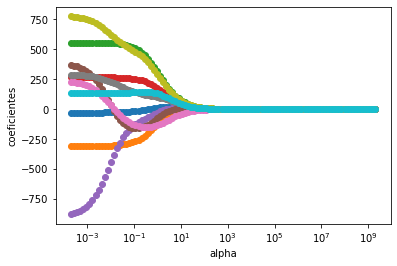

In [15]:
ax = plt.gca()
ax.plot(alphas, coef, 'o')
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('coeficientes')

<font color=green>**Vamos a separar las muestras en un set de entranamiento y una de prueba con el fin de estimar el error de la regresión.**

In [17]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=12)

<font color=green>**Realicemos el ajuste construyendo un modelo de Regresión Ridge utilizando el set de entrenamiento, y evaluamos su MSE sobre set de prueba, usando $\lambda = 1$ (arbitrario):**

In [18]:
ridge2 = Ridge(alpha = 1, normalize = True) # Descripción del modelo
ridge2.fit(X_train, y_train)             # Ajuste del modelo con el set de entrenamiento
pred2 = ridge2.predict(X_test)           # Usamos el modelo para predecir sobre los datos de prueba
print(pd.DataFrame(ridge2.coef_.T, index = X.columns, columns=['Coefs'])) # imprimos los coeficientes
print(mean_squared_error(y_test, pred2))          # Calculamos el MSE sobre los datos de prueba

          Coefs
age  -26.836294
sex  -93.835342
bmi  307.390511
bp   183.122104
s1     1.306202
s2   -39.898895
s3  -113.329300
s4    95.836306
s5   268.793764
s6   136.456722
3553.2867895757336


<font color=green>**El test-MSE cuando $\lambda = 1$ es de $3664$. Ahora veamos que pasa si usamos un valor grande de alfa, $\lambda = 10^{4}$:**

In [15]:
ridge3 = Ridge(alpha = 10**4, normalize = True) # Descripción del modelo
ridge3.fit(X_train, y_train)             # Ajuste del modelo con el set de entrenamientoa
pred3 = ridge3.predict(X_test)           # Usamos el modelo para predecir sobre los datos de prueba
print(pd.DataFrame(ridge3.coef_.T, index = X.columns, columns=['Coefs'])) # Imprimimos los coeficientes
print(mean_squared_error(y_test, pred3))          # Calculamos el MSE sobre los datos de prueba

        Coefs
age  0.020180
sex  0.010842
bmi  0.099763
bp   0.073533
s1   0.029014
s2   0.026966
s3  -0.076600
s4   0.082118
s5   0.111722
s6   0.043525
5582.434715594439


<font color=green>**Valores muy grandes de alfa reduce los coeficientes prácticamente hasta obtener el modelo nulo (el modelo contiene solo el intercepto y los demás coeficientes son cero), El resultado es un aumento del sesgo reflejado en un muy alto MSE.**

<font color=red>**Veamos ahora que pasa con el MSE si utilizamos un valor de alfa igual a cero $\lambda = 0$. Esta condición garantiza que la Regresión Ridge se convierta en una Regraesión por Mínimos Cuadrados Ordinaria.**

In [16]:
ridge4 = Ridge(alpha = 0, normalize = True) # Descripción del modelo
ridge4.fit(X_train, y_train)             # Ajuste del modelo con el set de entrenamientoa
pred4 = ridge4.predict(X_test)           # Usamos el modelo para predecir sobre los datos de prueba
print(pd.DataFrame(ridge4.coef_.T, index = X.columns, columns=['Coefs'])) # Imprimimos los coeficientes
print(mean_squared_error(y_test, pred4))          # Calculamos el MSE sobre los datos de prueba

          Coefs
age -140.582624
sex -402.621847
bmi  427.752774
bp   425.293000
s1  -567.363179
s2   199.363646
s3   -73.571747
s4   203.671047
s5   981.031986
s6   -55.657345
3732.9093096769716


<font color=red>**Parece que, efectivamente, la regresión Ridge logra mejorar respecto a los mínimos cuadrados normales. Sin embargo, en lugar de elegir arbitrariamente alfa, podríamos utilizar la validación cruzada para elegir el parámetro de ajuste alfa más adecuado. Podemos hacerlo utilizando la función `RidgeCV()`. Por defecto, la función realiza una validación cruzada generalizada (una forma eficiente de LOOCV), aunque esto puede cambiarse utilizando el argumento argumento `cv`.**

In [19]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.2834948325853604

<font color=blue>**Obtenemos el valor de alfa que genera el mas pequeño MSE, podemos utilizar este valor de alfa para determinar el test-MSE.**

In [20]:
ridge5 = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge5.fit(X_train, y_train)
mean_squared_error(y_test, ridge5.predict(X_test))

3141.383218350625

In [24]:
X=np.array(X)
y=np.array(y)

In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42) # Vamos hacer 5 separaciones sin barajar en cada separación
ridge6 = Ridge(alpha = ridgecv.alpha_, normalize = True)
x_traint = [] # Creamos arreglos de cada grupo de datos en los que almacenamos las diferentes divisiones 
x_testt = [] # Luego podremos utilizar la mejor separación para obtener el modelo más apropiado
y_traint = []
y_testt = []
mses = []
i = 1
for train_index, test_index in kf.split(X):
    x_train = X[train_index]
    x_test = X[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    ridge6.fit(x_train, y_train) #
    mse = mean_squared_error(y_test, ridge6.predict(x_test))
        
    # Almacenamos cada grupo en los arreglos creados
    x_traint.append(x_train) 
    x_testt.append(x_test)
    y_traint.append(y_train)
    y_testt.append(y_test)
    mses.append(mse)
   
    # Entrenamos el modelo para cada separación the model
    ridge6.fit(x_train, y_train) #Training the model
    print(f"MSE. {i} on the test set: {mean_squared_error(y_test, ridge6.predict(x_test))}")
    
    i += 1

MSE. 1 on the test set: 2996.9541942944584
MSE. 2 on the test set: 2314.42488060453
MSE. 3 on the test set: 3336.9471511901693
MSE. 4 on the test set: 2790.9505142743537
MSE. 5 on the test set: 3305.288852925357


In [30]:
y_tr=np.array(y_traint[mses.index(min(mses))]) # Escogemos el mejor set a partir del que presente el
y_te=np.array(y_testt[mses.index(min(mses))]) # el valor máximo de r2. Podríamos también elegir el que
X_tr=np.array(x_traint[mses.index(min(mses))]) # presente el menor valor del mse
X_te=np.array(x_testt[mses.index(min(mses))])

ridge7 = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge7.fit(X_tr, y_tr)
mean_squared_error(y_te, ridge7.predict(X_te))

2314.42488060453

<font color=blue>**El resultado representa una mejora adicional sobre el MSE de prueba que obtuvimos utilizando $\lambda = 1$. Por último, volvemos a ajustar nuestro modelo de Regresión Ridge para obtener los coeficientes utilizando el mejor valor de alfa.**

In [19]:
ridge5.fit(X, y)
pd.DataFrame(ridge5.coef_.T, index = X.columns, columns=['Coefs'])

,Coefs
age,-46.050979
sex,-291.883207
bmi,401.434475
bp,286.660611
s1,-60.418926
s2,-187.173230
s3,-184.851095
s4,116.267190
s5,533.910106
s6,107.470393
